# 聚类评价指标
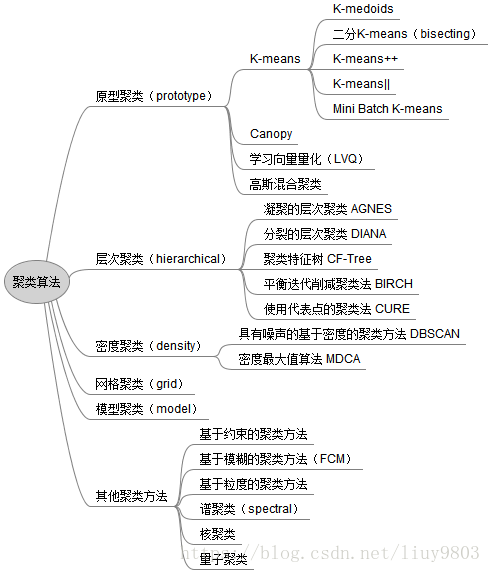

### 轮廓系数：
适用于实际类别信息未知的情况。对于单个样本，设a是与它同类别中其他样本的平均距离，b是与它距离最近不同类别中样本的平均距离，轮廓系数：S=(b-a)/max(a,b)。系数越大,聚类效果越好。
### Calinski-Harabaz Index
在真实的分群label不知道的情况下，可作为评估模型的一个指标。同时，数值越小可理解为组间协方差很小，组与组之间界限不明显。Calinski-Harabaz Index值越大聚类效果越好。

In [1]:
import pandas as pd
import numpy as np
from scipy import io
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans# abc
from sklearn import metrics

In [2]:
# 导入数据
datA=pd.read_excel(r'D:\Lc_Files\天津大学\论文写作、文献、专利\论文\数据\机器学习\第4章2013年9月\9月.xlsx')
print(datA)
# df转np
#dd=datA.values
#print(dd)

               A           B         C         D    E
0      95.295654  899.349976  1.894373 -4.898851  0.0
1      98.610901  899.349976  1.049684 -5.174968  0.0
2      98.199493  899.349976  0.560262 -4.118640  0.0
3      98.771988  899.349976  0.959936 -4.362795  0.0
4      78.410004  916.700012  0.271827 -3.097157  0.0
...          ...         ...       ...       ...  ...
10787  42.889999  916.700012  0.211079 -0.302971  0.0
10788  30.820000  916.700012  0.425171 -0.196743  0.0
10789  38.330002  916.700012  2.281436 -0.194189  0.0
10790  27.570000  916.700012  0.065875 -0.140524  0.0
10791  22.275000  916.700012  3.598826  0.043339  0.0

[10792 rows x 5 columns]


In [4]:
# 每个特征
data1=datA['A']
data2=datA['B']
data3=datA['C']
data4=datA['D']
data5=datA['E']
#data6=datA['F']
#data7=datA['G']
# data8=datA['H']

In [5]:
# 拼接
DATA2=np.vstack((data1,data2,data3,data4,data5)).T
print(DATA2)

[[ 9.52956543e+01  8.99349976e+02  1.89437282e+00 -4.89885139e+00
   0.00000000e+00]
 [ 9.86109009e+01  8.99349976e+02  1.04968393e+00 -5.17496777e+00
   0.00000000e+00]
 [ 9.81994934e+01  8.99349976e+02  5.60262382e-01 -4.11864042e+00
   0.00000000e+00]
 ...
 [ 3.83300018e+01  9.16700012e+02  2.28143620e+00 -1.94188714e-01
   0.00000000e+00]
 [ 2.75699997e+01  9.16700012e+02  6.58754259e-02 -1.40524119e-01
   0.00000000e+00]
 [ 2.22749996e+01  9.16700012e+02  3.59882641e+00  4.33392189e-02
   0.00000000e+00]]


In [25]:
# 寻找最好的分类数
def juleipingjia(n):
    julei=KMeans(n_clusters=n)
    julei.fit(DATA2)
    label=julei.labels_
    lkxs=silhouette_samples(DATA2,label,metric='euclidean')
    means=np.mean(lkxs)
    return means

In [22]:
# 寻找最好的分类数
from sklearn import metrics
def juleipingjia2(n):
    kmeans_model = KMeans(n_clusters=n).fit(DATA2)
    labels = kmeans_model.labels_
    lk = metrics.davies_bouldin_score(DATA2, labels)
    means=np.mean(lk)
    return means

In [26]:
y=[]
for n in range(2,15):
    means=juleipingjia(n)
    y.append(means)
    print(n)
print(y)

2
3
4
5
6
7
8
9
10
11
12
13
14
[0.6223106396496841, 0.6912122374850559, 0.6474184092079048, 0.6412527099257408, 0.5485652027290752, 0.5493371364811468, 0.5562806807054721, 0.558503780465885, 0.5473156761378114, 0.5222542379852729, 0.5016601480204266, 0.46164674251446847, 0.47810659976336317]


In [44]:
# 数据预处理
ss = StandardScaler()
std_data = ss.fit_transform(DATA2)
print(std_data)
origin_data = ss.inverse_transform(std_data)
print(origin_data)

[[ 0.43170647 -0.370024   -0.54803266  2.28438297 -2.01511829]
 [ 0.73855552  0.49264433 -1.5608067   2.43172031 -2.01511829]
 [ 0.276262   -0.370024   -1.47411895  2.30890986 -2.01511829]
 ...
 [-4.32446527 -0.370024   -0.8673631   2.67570939 -2.01511829]
 [-5.11803513 -0.370024   -1.65745069  2.62472408 -2.01511829]
 [-7.51478186 -0.370024   -1.3677684   2.80334137 -2.01511829]]
[[ 9.84800034e+01  8.99349976e+02  1.08964610e+00 -2.61150627e+01
  -2.77555756e-17]
 [ 1.00000000e+02  9.12805115e+02  4.52434421e-02 -2.53630085e+01
  -2.77555756e-17]
 [ 9.77099991e+01  8.99349976e+02  1.34638429e-01 -2.59898701e+01
  -2.77555756e-17]
 ...
 [ 7.49199982e+01  8.99349976e+02  7.60343075e-01 -2.41176147e+01
  -2.77555756e-17]
 [ 7.09889984e+01  8.99349976e+02 -5.44187091e-02 -2.43778591e+01
  -2.77555756e-17]
 [ 5.91165581e+01  8.99349976e+02  2.44310275e-01 -2.34661427e+01
  -2.77555756e-17]]


In [12]:
# 将最好的n_clusters代入
n_clusters=3;
julei=KMeans(n_clusters)
model=julei.fit(DATA2)
label_pred=julei.labels_

print(label_pred)

[1 1 1 ... 2 2 2]


In [8]:
# save标签数据
b=np.array(label_pred)
io.savemat('b.mat', {'array': b})

In [13]:
# 聚类中心
cluster_centers = julei.cluster_centers_
print('cluster_centers:\n',cluster_centers)

cluster_centers:
 [[ 8.78864355e+01  9.12402495e+02  8.61822665e-01 -4.33944377e+00
   4.90475528e-02]
 [ 9.38545663e+01  8.88026544e+02  2.00097515e+00 -8.73187867e+00
   1.95409480e-01]
 [ 4.59563892e+01  9.14631278e+02  9.02766515e-01 -1.29915974e+00
   1.83711595e-03]]


In [ ]:
#绘制k-means结果
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X=DATA2
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
# x3 = X[label_pred == 3]
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(x0[:, 0], x0[:, 1],x0[:, 2], c = "red", marker='^', label='label0')
plt.scatter(x1[:, 0], x1[:, 1],x1[:, 2], c = "blue", marker='+', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "green", marker='+', label='label2')
# plt.scatter(x3[:, 0], x3[:, 1], c = "blue", marker='x', label='label3')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
ax.view_init(90, 0)
plt.legend(loc=2)
plt.show()

In [ ]:
#50 0.5 270

In [100]:
# 输入新的样本预测属于哪一类
datB=pd.read_excel(r'C:\Users\Admin\Desktop\dd.xlsx')
print(datB)
data1=datB['AA']
data2=datB['BB']
data3=datB['CC']
DATA3=np.vstack((data1,data2,data3)).T
print(DATA3)

   AA   BB   CC
0  50  0.5  270
[[ 50.    0.5 270. ]]


In [109]:
Y=model.predict(DATA3)
print(Y)

[1]


In [91]:
# 聚类好坏的评价指标silhouette_samples轮廓系数
lkxs=silhouette_samples(DATA2,label)

In [92]:
print(lkxs)

[0.74655801 0.68541264 0.63083644 ... 0.65696865 0.59856693 0.4169642 ]


In [93]:
means=np.mean(lkxs)
print(means)

0.5932586915550714
